<div class="alert alert-danger" role="alert">
<h1 align="center"><font size = 14>Polynomial-Regularization (from sketch)</font></h1>
<h4 align="center">September 18-2024<h4>
<h3 align="center">Armin Amani</h3>

<div class="alert alert-danger" role="alert">
📤 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<div class="alert alert-danger" role="alert"> 
💾 Read CSV file

In [2]:
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIC','B','LSTAT','Price']
df = pd.read_csv('Boston_house_price.csv',delimiter='\s+',names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIC,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIC,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIC  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<div class="alert alert-danger" role="alert"> 
🔎 Data Visualize

In [5]:
def plot_feature(df,Feature,Target):
    plt.scatter(data=df,x=Feature,y=Target,color='purple')
    plt.xlabel('FEATURE')
    plt.ylabel('TARGET')
    plt.show()

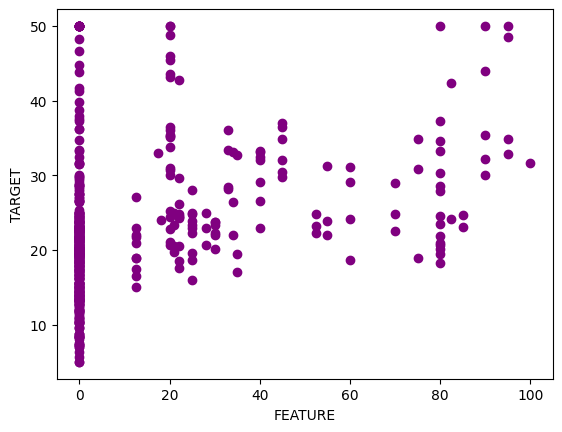

In [6]:
plot_feature(df=df,Feature='ZN',Target='Price')

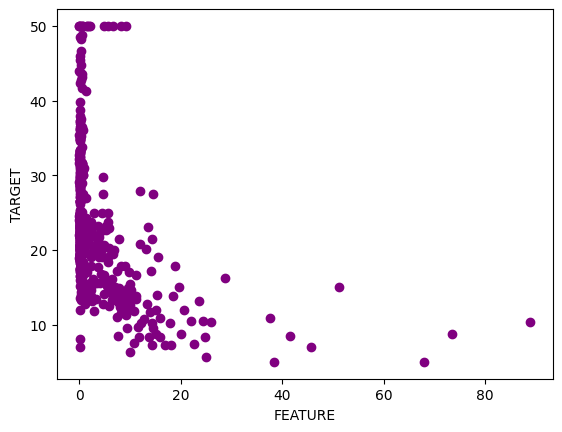

In [7]:
plot_feature(df=df,Feature='CRIM',Target='Price')

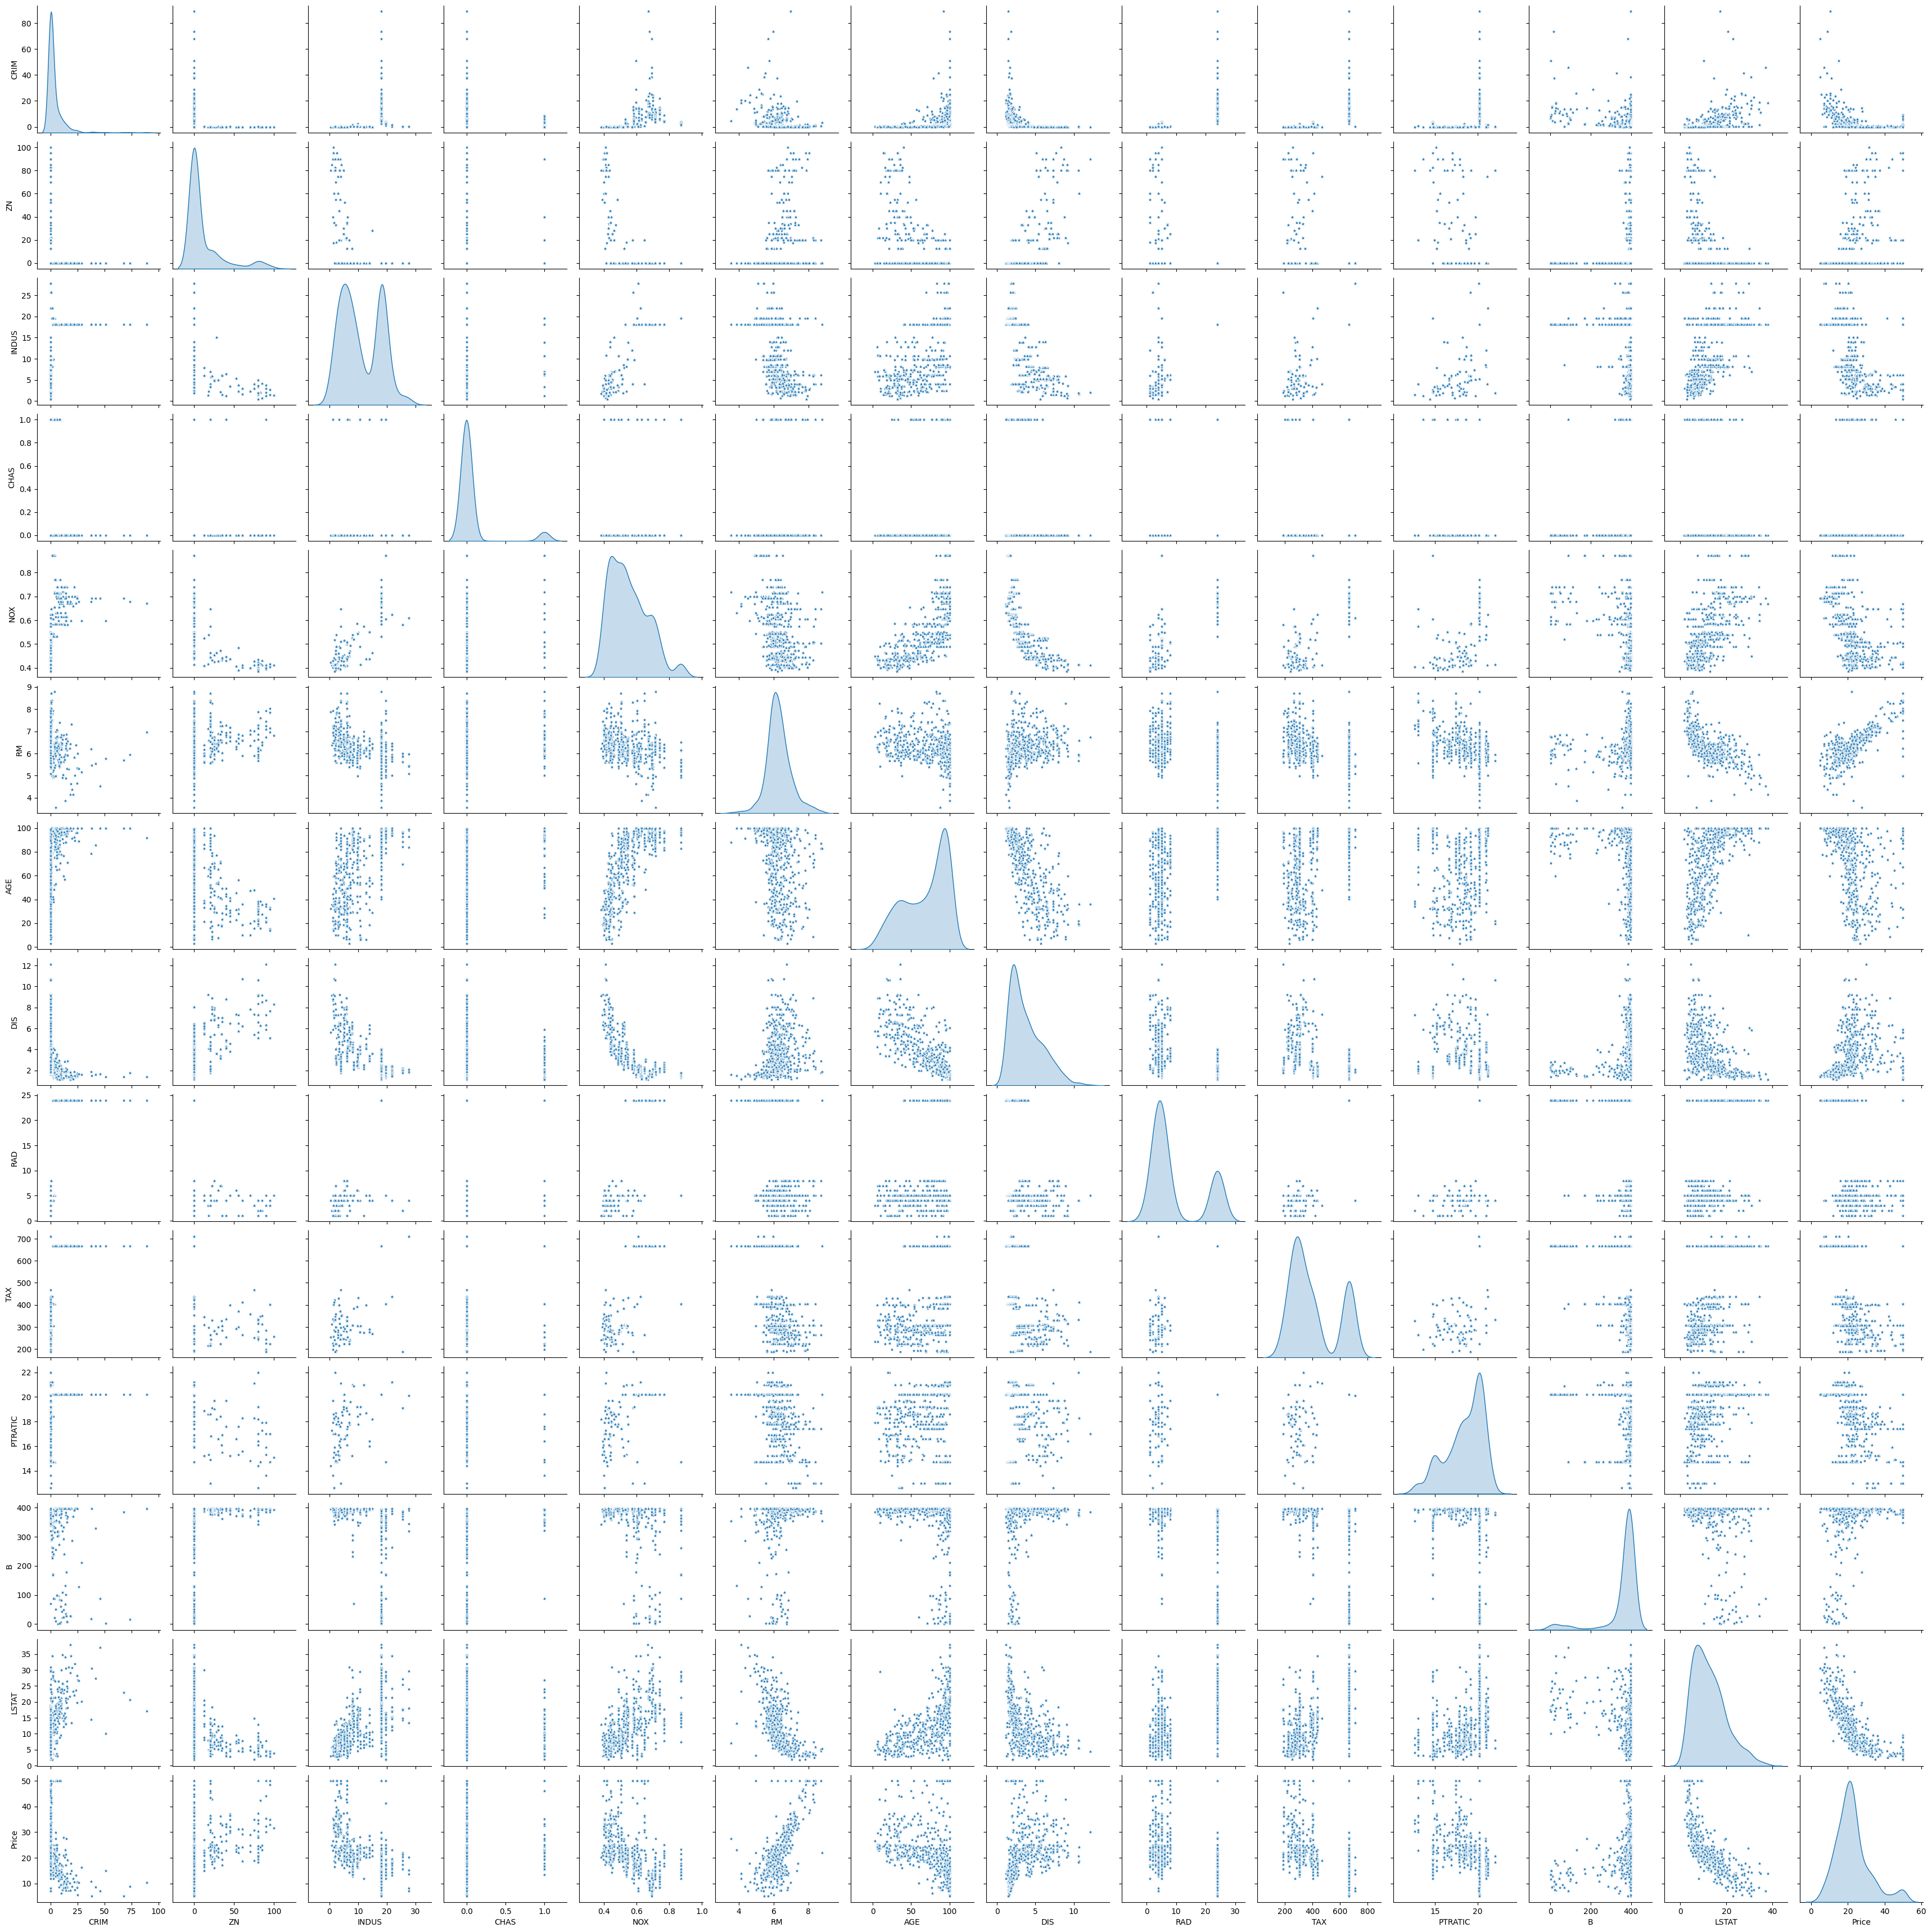

In [8]:
sns.pairplot(data=df,diag_kind='kde',markers='*')

<Axes: >

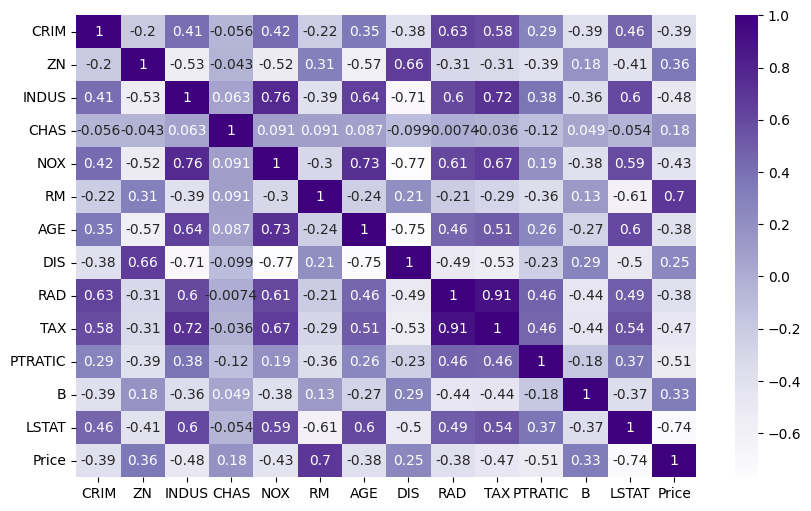

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='Purples',cbar=True)

<div class="alert alert-danger" role="alert"> 
🔎 Seperate x & y

In [10]:
x = df.drop('Price',axis=1)
y = df['Price']

In [11]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIC,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [12]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

<div class="alert alert-danger" role="alert"> 
🔎 Create the model

In [13]:
poly_model = PolynomialFeatures(degree=2,include_bias=True)
poly_model

PolynomialFeatures()

In [14]:
poly_feature = poly_model.fit_transform(x)
poly_feature.shape

(506, 105)

<div class="alert alert-danger" role="alert"> 
🔎 train & test split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(poly_feature,y,test_size=0.3,random_state=101)

<div class="alert alert-danger" role="alert"> 
🔎 RidgeCV (Regularization)

In [16]:
model = RidgeCV(alphas=(1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3),cv=5)
model

RidgeCV(alphas=(1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07,
                1e-06, 1e-05, 0.0001, 0.001),
        cv=5)

In [17]:
model.fit(x_train,y_train)

C:\Users\Beethoven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.88675e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Beethoven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.76711e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Beethoven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.82706e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\User

RidgeCV(alphas=(1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07,
                1e-06, 1e-05, 0.0001, 0.001),
        cv=5)

In [18]:
model.alpha_

0.001

In [19]:
print(f"coefficients : {model.coef_}")
print("*"*100)
print(f"intercept : {model.intercept_}")

coefficients : [ 0.00000000e+00  6.22496122e-01  1.93911077e-02 -3.28496100e+00
  2.45344369e-01  2.42472336e+01  1.39200243e+01  7.04196323e-01
 -1.33954375e+01  5.39279670e+00 -1.75444455e-01  4.43990772e+00
  9.20295459e-02  2.80343719e-02 -1.16868286e-04  1.19712906e-01
  1.16115179e-01  1.09266486e+00 -8.18806297e-01  1.77822260e-01
 -5.84958774e-03 -1.18917389e-01 -1.69062951e-03 -1.95195410e-03
 -7.52615839e-02 -5.35778908e-04  1.70026050e-02 -6.70259702e-04
 -7.24704891e-03 -4.65336332e-02 -9.60734185e-01  3.20847559e-02
 -6.92975113e-04 -2.11920880e-02 -3.43642080e-03  6.42033193e-04
 -7.03823499e-03  9.55550690e-04 -8.12219501e-04  1.89874660e-02
  1.11548158e-01  2.12194433e+00  4.21455139e-02  3.04913428e-03
  1.69730906e-01  3.10145478e-02 -1.78166720e-04  4.08501075e-02
  6.83362929e-04 -2.18176180e-02  2.45344369e-01 -1.49922668e+01
 -6.45513142e-01 -2.71652828e-02  1.71972255e+00 -1.51643699e-01
  1.67206335e-02 -4.50483269e-01  2.89893904e-02 -2.35145853e-02
 -1.741909

<div class="alert alert-danger" role="alert"> 
🔎 Prediction

In [20]:
y_predict = model.predict(x_test)
y_predict

array([47.88552138, 29.63951091, 16.93702839, 16.0287419 , 28.27540744,
       29.45092101, 44.12775547, 17.35643281, 35.0772401 ,  6.49879838,
       26.46904431, 13.58210991, 14.59430668, 25.00337909, 22.72307898,
       25.95692744,  8.95305539, 30.30908496, 26.97294252, 24.40976953,
        9.70675853, 23.70353662, 18.86117804, 31.47976516, 33.02841521,
       17.91032936, 27.74442034, 17.88231816, 37.02624417, 33.76692171,
       21.88232298, 17.9866591 , 36.65542957, 53.37126044, 30.77260004,
       22.06155545, 13.6540716 , 15.25797214,  4.92868301, 32.7838223 ,
       21.95194374, 21.68773556, 38.19196587, 13.95073985, 18.89905504,
       22.44896743, 29.98434148, 15.54977754, 24.41697582, 31.36529282,
       32.51399721, 35.4546297 , 18.59393517, 24.22253971, 31.14716697,
       15.51938838, 18.95601677, 18.35450733, 22.430182  , 18.8607545 ,
       35.38976582, 15.18242499, 34.57011674, 19.23481254, 10.31473718,
       24.05946047, 23.5814329 , 17.98683817, 12.35341875, 19.10

In [21]:
y_test

195    50.0
4      36.2
434    11.7
458    14.9
39     30.8
       ... 
213    28.1
269    20.7
278    29.1
17     17.5
391    23.2
Name: Price, Length: 152, dtype: float64

<div class="alert alert-danger" role="alert"> 
🔎 Loss Function

In [22]:
MAE = metrics.mean_absolute_error(y_test,y_predict)
MAE

2.6872897869902905

In [23]:
MSE = metrics.mean_squared_error(y_test,y_predict)
MSE

14.53570431517432

In [24]:
RMSE = np.sqrt(MSE)
RMSE

3.812571876722368

In [25]:
lf_df2 = pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE','RMSE'],columns=['PR'])
lf_df2

,PR
MAE,2.687290
MSE,14.535704
RMSE,3.812572


<div class="alert alert-danger" role="alert"> 
🔎 Data Scalling

In [26]:
scaler = StandardScaler()
scaler

StandardScaler()

In [27]:
scaler.fit(x_train)

StandardScaler()

In [28]:
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

<div class="alert alert-danger" role="alert"> 
🔎 Sketch Loss Function

In [29]:
def Loss_function(x,y,theta,theta0,landa):
    m = x.shape[0]
    h_theta = np.dot(x,theta)+theta0
    error = h_theta - y
    j = ((np.sum(error**2))+(landa*np.sum(theta**2)))
    j = j/2*m
    return j,error

<div class="alert alert-danger" role="alert"> 
🔎 GD

In [30]:
def gradient(x,y,theta,theta0,landa):
    m = x.shape[0]
    n = x.shape[1]
    dj_dtheta = np.zeros((n,))
    dj_dtheta0 = 0.0
    for i in range(m):
        h_theta = np.dot(x.iloc[i, :],theta)+theta0
        error = h_theta - y.iloc[i]
        for j in range(n):
            dj_dtheta[j] += error * x.iloc[i,j]
        dj_dtheta0 += error
    dj_dtheta = dj_dtheta/m + landa*theta
    dj_dtheta0 = dj_dtheta0/m
    return dj_dtheta,dj_dtheta0

In [31]:
x_train_s_df = pd.DataFrame(x_train_s)
x_train_s_df[1]

0     -0.427041
1      0.364268
2      0.016472
3     -0.423182
4     -0.416598
         ...   
349   -0.414124
350   -0.392641
351   -0.425788
352   -0.415220
353   -0.419829
Name: 1, Length: 354, dtype: float64

In [32]:
theta = np.ones((x_train_s_df.shape[1],))
theta0 = 1.0
gradient(x_train_s_df,y_train,theta,theta0,landa=1e-8)

(array([ 1.00000000e-08,  2.88847965e+01, -7.60231609e+00,  2.76776119e+01,
         9.01240059e+00,  2.65168230e+01, -1.23759728e+01,  2.34906641e+01,
        -1.70616562e+01,  3.33812934e+01,  3.43093502e+01,  1.94451927e+01,
        -1.13432263e+01,  2.80250517e+01,  1.69728405e+01, -1.05306824e+01,
         2.90360272e+01,  1.17932152e+01,  2.91640578e+01,  2.83803871e+01,
         2.86653760e+01,  2.99007638e+01,  2.89036032e+01,  2.89444775e+01,
         2.88998415e+01,  2.72354986e+01,  2.76467835e+01, -4.14642800e+00,
        -8.01267059e+00,  8.09806818e-01, -8.35575469e+00, -7.94181129e+00,
        -7.79659410e+00, -4.72680890e+00, -7.79370016e+00, -6.58144231e+00,
        -6.88368595e+00, -7.60994407e+00, -5.47094556e+00,  2.56849295e+01,
         1.03021006e+01,  2.95410520e+01,  2.68865005e+01,  2.97343552e+01,
         1.11847235e+01,  3.45344338e+01,  3.34902001e+01,  2.94168594e+01,
         2.12258644e+01,  3.04485421e+01,  9.01240059e+00,  1.03486859e+01,
         8.4

In [33]:
def gradient_des(x,y,alpha,iters,theta,theta0,landa):
    j_h = np.zeros((iters,2))
    j_history = []
    for i in range(iters):
        dj_dtheta,dj_dtheta0 = gradient(x,y,theta,theta0,landa)

        theta = theta - alpha * dj_dtheta
        theta0 = theta0 - alpha * dj_dtheta0

        j,_ = Loss_function(x,y,theta,theta0,landa)
        j_history.append(j)
        j_h[i,0] = i
        j_h[i,1] = j
        print(f"iteration:{i} ===> j(theta0,theta):{j_history[i]}")
    return theta,theta0,j_history,j_h

In [34]:
x_train_s_df.shape

(354, 105)

In [35]:
y_train.shape

(354,)

In [36]:
theta,theta0,j_history,j_h = gradient_des(x_train_s_df,y_train,alpha=0.01,iters=3000,theta=np.zeros_like(x_train[0]),theta0=1,landa=1e-8)

iteration:0 ===> j(theta0,theta):30568804.005118042
iteration:1 ===> j(theta0,theta):29462758.327636443
iteration:2 ===> j(theta0,theta):28625836.973386247
iteration:3 ===> j(theta0,theta):27902824.855423138
iteration:4 ===> j(theta0,theta):27238836.7765918
iteration:5 ===> j(theta0,theta):26613089.634863667
iteration:6 ===> j(theta0,theta):26016635.516620003
iteration:7 ===> j(theta0,theta):25444825.391601928
iteration:8 ===> j(theta0,theta):24894719.75881782
iteration:9 ===> j(theta0,theta):24364169.041838147
iteration:10 ===> j(theta0,theta):23851464.054025248
iteration:11 ===> j(theta0,theta):23355186.061370082
iteration:12 ===> j(theta0,theta):22874130.51114539
iteration:13 ===> j(theta0,theta):22407260.76327239
iteration:14 ===> j(theta0,theta):21953676.037256587
iteration:15 ===> j(theta0,theta):21512587.384119116
iteration:16 ===> j(theta0,theta):21083298.91050957
iteration:17 ===> j(theta0,theta):20665192.78429441
iteration:18 ===> j(theta0,theta):20257717.10820997
iteration:1

<div class="alert alert-danger" role="alert"> 
🔎 Learning Plot

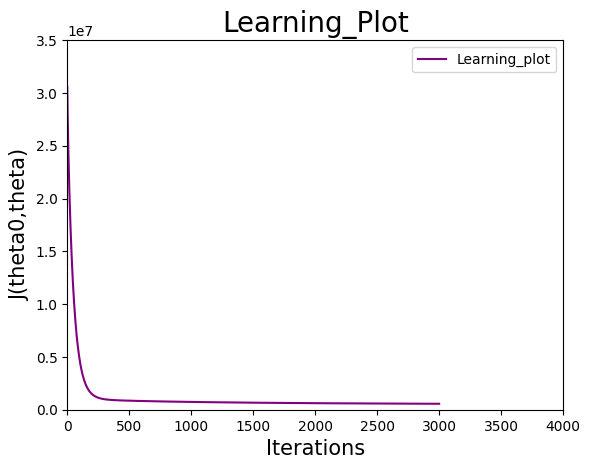

In [37]:
plt.plot(j_h[:,[0]],j_h[:,[1]],color='purple',label='Learning_plot')
plt.xlim([0,4000])
plt.ylim([0,35000000])
plt.title('Learning_Plot',fontsize=20)
plt.xlabel('Iterations',fontsize=15)
plt.ylabel('J(theta0,theta)',fontsize=15)
plt.legend()
plt.show()

In [38]:
lf_df2

,PR
MAE,2.687290
MSE,14.535704
RMSE,3.812572


In [39]:
j,_=Loss_function(x_test_s,y_test,theta,theta0,landa=1e-8)

In [40]:
j

193065.46883678905